In [1]:
import sys
sys.path.append('../')
import torch
import torch.nn as nn
from Code.envs.GPEnv import PassiveEnv
from PIL import Image
from matplotlib import pyplot as plt
#%matplotlib


In [2]:
BATCH_SIZE = 1
SIM_TIME = 1
MAX_ITER = 50
device = torch.device('cuda')
USE_JIT = False

env = PassiveEnv(BATCH_SIZE, MAX_ITER, device)



In [3]:
from Code.Networks import OuterWrapper
model = torch.load('../models/rsnn_gppred4')
model_memory = model.layers.mem_loop

model = OuterWrapper(model, device, USE_JIT)
model_memory = OuterWrapper(model_memory, device, USE_JIT)

In [4]:
inputs, targets = env.getBatch()
outputs, _ = model(inputs)

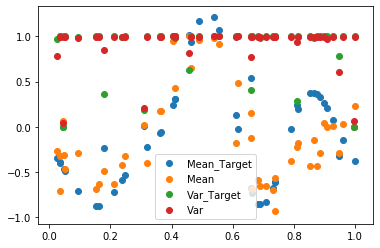

In [5]:

plt.scatter(inputs[:, 0, 2].cpu(), targets[:, 0, 1].cpu(), label='Mean_Target')
plt.scatter(inputs[:, 0, 2].cpu(), outputs[:, 0, 1].detach().cpu(), label='Mean')
plt.scatter(inputs[:, 0, 2].cpu(), targets[:, 0, 0].cpu(), label='Var_Target')
plt.scatter(inputs[:, 0, 2].cpu(), torch.sigmoid(outputs[:, 0, 0].cpu()).detach(), label='Var')
plt.legend()



In [6]:
memories, _ = model_memory(inputs[:20, :1, :2])
memories_bw, _ = model_memory(torch.flip(inputs[:20, :1, :2], dims=[0]))

In [7]:
memories[..., 63:] = 1 - memories[..., 63:]
memories_bw[..., 63:] = 1 - memories_bw[..., 63:]



In [8]:

img = Image.new('RGB',(128,20),color=128)

In [9]:
for i in range(20):
    for k in range(128):
        img.putpixel((k, i), (int(memories[i, 0, k])*255, int(memories_bw[i, 0, k])*255, 0))


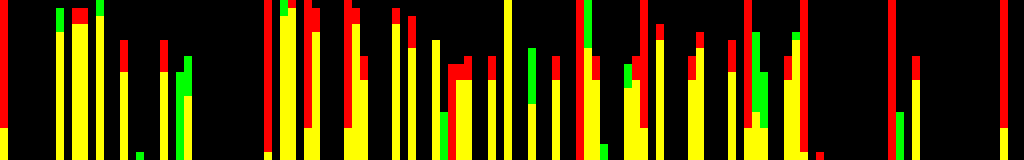

In [10]:
img.resize((1024, 160))